### This Notebook Showcases all of the Visualizations for our Dashboard

In [8]:
from reddit_scraper import RedditScraper
from dash import dcc
import plotly.express as px
import matplotlib.pyplot as plt
# from models import Sentiment_Scorer
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
scraper = RedditScraper()

In [4]:
df = scraper.scrape_subreddit_submissions("UIUC")
df.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,268,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,24,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27
2,18brse4,2023-12-06 01:01:40,feeling empty,It's my birthday tomorrow. I miss home. I have...,Mouskatoodle_T,36,0.98,18,https://www.reddit.com/r/UIUC/comments/18brse4...,2023-12-06
3,18bf89v,2023-12-05 16:01:21,THE SIRENS,THE SIRENS\n\nTHEY CRY OUT IN WARNING\n\nBUT W...,Nick_Gaugh_69,137,0.93,12,https://www.reddit.com/r/UIUC/comments/18bf89v...,2023-12-05
4,18bnwhv,2023-12-05 22:10:07,Really dumb question but if you check out a li...,There are so many libraries,Green-Fennel7130,28,0.95,5,https://www.reddit.com/r/UIUC/comments/18bnwhv...,2023-12-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        300 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
 9   date          300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 23.6+ KB


### Applying Vader Results

In [6]:
model = Sentiment_Scorer(df, 'K Nearest Neighbors')
df_polarity = model.label_dataset()
df_polarity.head()

c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarn

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date,sentiment
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,268,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06,1
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,24,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27,1
2,18brse4,2023-12-06 01:01:40,feeling empty,It's my birthday tomorrow. I miss home. I have...,Mouskatoodle_T,36,0.98,18,https://www.reddit.com/r/UIUC/comments/18brse4...,2023-12-06,1
3,18bf89v,2023-12-05 16:01:21,THE SIRENS,THE SIRENS\n\nTHEY CRY OUT IN WARNING\n\nBUT W...,Nick_Gaugh_69,137,0.93,12,https://www.reddit.com/r/UIUC/comments/18bf89v...,2023-12-05,1
4,18bnwhv,2023-12-05 22:10:07,Really dumb question but if you check out a li...,There are so many libraries,Green-Fennel7130,28,0.95,5,https://www.reddit.com/r/UIUC/comments/18bnwhv...,2023-12-05,0


In [15]:
import nltk
import pandas as pd
import random
import numpy as np
import joblib
import nltk.classify
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('movie_reviews')
import time

class Sentiment_Scorer:
    def __init__(self, data, model):
        self.t = time.process_time()
        self.data = data
        if model == None:
            raise Exception("Model has not been selected")
        if model == 'K Nearest Neighbors':
            self.model = joblib.load('joblib-KNN-Model.pkl')
        elif model == 'Decision Tree':
            self.model = joblib.load('joblib-DT-Model.pkl')
        elif model == 'Random Forest':
            self.model = joblib.load('joblib-RF-Model.pkl')
        elif model == 'Logistic Regression':
            self.model = joblib.load('joblib-LR-Model.pkl')
        elif model == 'SGD Classifier':
            self.model = joblib.load('joblib-SC-Model.pkl')
        elif model == 'Hard Voting Classifier':
            self.model = joblib.load('joblib-vh-Model.pkl')
        elif model == 'Soft Voting Classifier':
            self.model = joblib.load('joblib-vs-Model.pkl')
        else:
            raise Exception("The selected model is not currently supported by our API")
    
        print("Loaded Model: {}".format(time.process_time() - self.t))
            
        self.tfidf_vectorizer = joblib.load('tfidf-vector.pkl')

        unwanted = nltk.corpus.stopwords.words("english")
        unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
        def skip_unwanted(pos_tuple):
            word, tag = pos_tuple
            if not word.isalpha() or word in unwanted:
                return False
            if tag.startswith("NN"):
                return False
            return True
        print("Removed Stopwords: {}".format(time.process_time() - self.t))
        self.positive_words = [word for word, tag in filter(
                          skip_unwanted,
                          nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
                        )]
        self.negative_words = [word for word, tag in filter(
                          skip_unwanted,
                          nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
                        )]
        # self.positive_words = np.array([word for word, tag in filter(
        #                   skip_unwanted,
        #                   nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["pos"]))
        #                 )])
        # self.negative_words = np.array([word for word, tag in filter(
        #                   skip_unwanted,
        #                   nltk.pos_tag(nltk.corpus.movie_reviews.words(categories=["neg"]))
        #                 )])

        self.analyzer = SentimentIntensityAnalyzer()
        self.ps = PorterStemmer()
        print("Got Negative and Positive Words: {}".format(time.process_time() - self.t))

    def get_features(self, text):
        def intersection(list1,list2):
            x = set(list1)
            y = set(list2)
            z = x.intersection(y)
            return len(z)
    
        
        features = {}
        
        # Feature #1 - verbosity
        features['verbosity'] = len(text)
        
        # Feature #2 - lexical word choice
        scores = self.analyzer.polarity_scores(text)
        features['vader(pos)'] = scores['pos']
        features['vader(neg)'] = scores['neg']
        features['vader(neu)'] = scores['neu']
        features['vader(compound)'] = scores['compound']
        
        # Feature #3 - Positive and Negative Words Frequency
        # words = np.array(word_tokenize(text))
        # words = np.vectorize(self.ps.stem)(words)
        words = [self.ps.stem(word) for word in words]
        
        pos = intersection(words,self.positive_words)
        neg = intersection(words,self.negative_words)
        # pos = len(np.intersect1d(words, self.positive_words))
        # neg = len(np.intersect1d(words, self.negative_words))
        
        features['num_pos'] = pos
        features['num_neg'] = neg
        
        print("Finished Intersection: {}".format(time.process_time() - self.t))
        
        try:
            features['tone'] = (pos-neg) / (pos+neg)
        except:
            features['tone'] = 0
    
        # Feature #4 - TFIDF
        vectors = self.tfidf_vectorizer.transform([text]).toarray()
    
        for column in range(vectors.shape[1]):
            feature_name = 'tfidf_' + str(column)
            features[feature_name] = vectors[0][column]    

        print("Finished TF-IDF: {}".format(time.process_time() - self.t))
        return features


    def label_dataset(self):
        ## 0 Indicating it is a Neutral Tweet/Comment
        ## 1 Indicating a Postive Sentiment
        ## -1 Indicating a Negative Tweet/Comment
        res = []
        for index, row in self.data.iterrows():
            try:
                res.append(self.model.classify(self.get_features(row['text'])))
            except:
                res.append(None)
        result_df = self.data
        result_df['sentiment'] = res
    
        return result_df

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [16]:
df_predict = pd.read_csv('raw_data/computerscience_hot_posts.csv')
Sentiment_Score = Sentiment_Scorer(df_predict,'K Nearest Neighbors')
result = Sentiment_Score.label_dataset()
result.head()

c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarn

Loaded Model: 0.015625
Removed Stopwords: 0.09375
Got Negative and Positive Words: 104.734375


,Unnamed: 0,created_utc,title,text,author,score,upvote_ratio,num_comments,url,sentiment
0,0,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...,None
1,1,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...,None
2,2,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...,None
3,3,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...,None
4,4,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...,None


In [11]:
df_predict = pd.read_csv('raw_data/computerscience_hot_posts.csv')
Sentiment_Score = Sentiment_Scorer(df_predict,'K Nearest Neighbors')
result = Sentiment_Score.label_dataset()
result.head()

c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\timo7\Desktop\UIUC Fall 2023\TIS\cis-410-project\.venv\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarn

,Unnamed: 0,created_utc,title,text,author,score,upvote_ratio,num_comments,url,sentiment
0,0,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...,NaN
1,1,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...,1.0
2,2,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...,1.0
3,3,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...,1.0
4,4,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...,1.0


### Visualization 1 - Word Cloud (We Can Do This for Each Sentiment)

In [ ]:
from wordcloud import WordCloud
from PIL import Image


from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def generate_wordcloud(df_):
    vocab = df_.dropna()['text'].str.replace(r'\?|\.|\'', ' ')
    vocab = ' '.join(vocab)
    vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])
    wc = WordCloud().generate(vocab)
    plt.imshow(wc)
    return vocab, wc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### One for Positive Sentiment

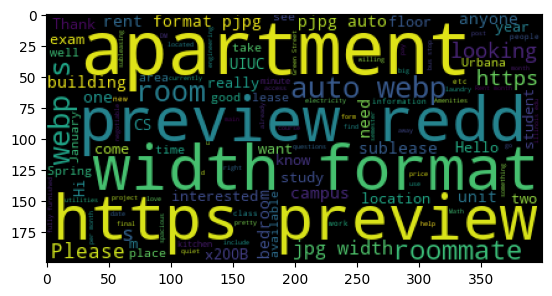

In [ ]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Positive'])

### One for Negative Sentiment

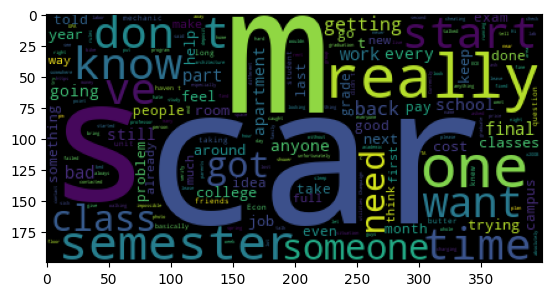

In [ ]:
vocab, wordcloud = generate_wordcloud(df_polarity[df_polarity['sentiment'] == 'Negative'])

### Visualization 2, Sentiment Counts Over Time (will be a line graph or Stacked bar chart depending on how sparse the data is)

- Group by Week, Plot Sentiment

In [ ]:
df_polarity["week"] = df["created_utc"].dt.to_period("W").dt.to_timestamp()
df_polarity['week']

0     2021-03-01
1     2023-11-27
2     2023-12-04
3     2023-12-04
4     2023-12-04
         ...    
295   2023-11-27
296   2023-11-27
297   2023-11-27
298   2023-11-27
299   2023-11-27
Name: week, Length: 300, dtype: datetime64[ns]

In [ ]:
df_polarity['date'] = pd.to_datetime(df_polarity['created_utc']).dt.date

<Axes: xlabel='date'>

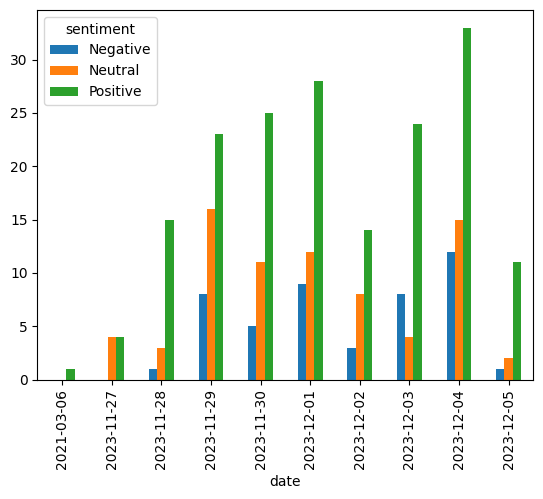

In [ ]:
df_polarity.groupby('date')['sentiment'].value_counts().unstack().fillna(0).plot(kind='bar')

### Visualization 3, Pie Chart

<Axes: ylabel='count'>

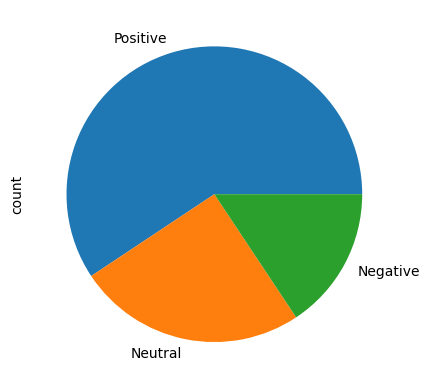

In [ ]:
(df_polarity['sentiment'].value_counts() / len(df)).plot(kind='pie')

### Visualization 4 - Sentiment Label vs Scores and Ratio

In [ ]:
df_polarity[['sentiment', 'upvote_ratio', 'score']]

,sentiment,upvote_ratio,score
0,Positive,0.99,264
1,Neutral,1.00,22
2,Negative,0.96,103
3,Positive,0.94,24
4,Negative,1.00,18
...,...,...,...
295,Positive,1.00,1
296,Neutral,0.96,234
297,Positive,1.00,5
298,Positive,0.96,62


<Axes: xlabel='sentiment', ylabel='score'>

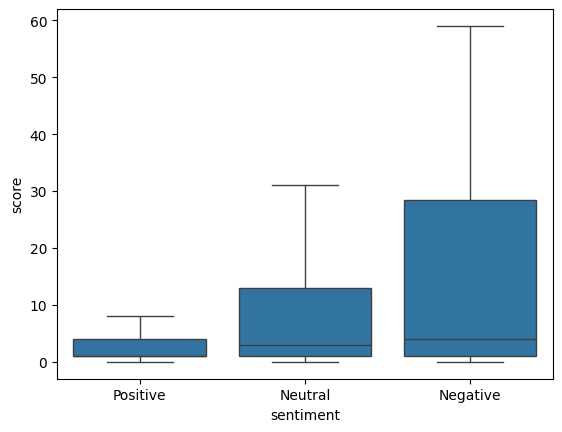

In [ ]:
sns.boxplot(df_polarity, x='sentiment', y='score', showfliers=False)

<Axes: xlabel='sentiment', ylabel='upvote_ratio'>

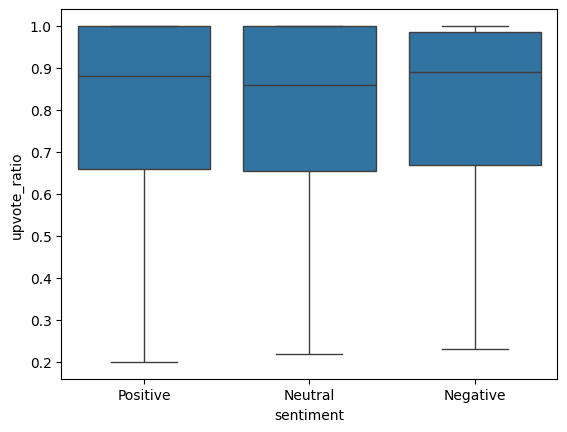

In [ ]:
sns.boxplot(df_polarity, x='sentiment', y='upvote_ratio', showfliers=False)

### Visualization 5 - Most Common Words for Each Sentiment

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
import re
from nltk.probability import FreqDist
import string

def preprocess_text(df_):
    punctuation = string.punctuation + '’'
    df_['text'] = df_['text'].apply(lambda x:  x.translate(str.maketrans('', '', punctuation)))
    df_['text'] = df_['text'].apply(lambda x:  x.lower())
    df_['text'] = df_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    df_['text'] = df_['text'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', x))
    df_['text'] = df_['text'].apply(lambda x: re.sub("(@[A-Za-z0-9_]+)","", x))
    df_['tokens'] = df_['text'].apply(lambda x: word_tokenize(x))

df_copy = df_polarity.copy()
preprocess_text(df_copy)
df_copy['text'].iloc[:10]

0    make new post dont see appear new couple minut...
1    added new flair sublease posts titled sublease...
2    birthday tomorrow miss home havent seen sister...
3    sirens cry warning ignore know danger wailing ...
4                                       many libraries
5                                         fuck go hell
6                                                     
7    anyone know jailbreakfactory reset macbook don...
8                                                     
9    friend concert tonight really want get flowers...
Name: text, dtype: object

In [35]:
df_polarity.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date,sentiment
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,268,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06,1
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,24,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27,1
2,18brse4,2023-12-06 01:01:40,feeling empty,It's my birthday tomorrow. I miss home. I have...,Mouskatoodle_T,36,0.98,18,https://www.reddit.com/r/UIUC/comments/18brse4...,2023-12-06,1
3,18bf89v,2023-12-05 16:01:21,THE SIRENS,THE SIRENS\n\nTHEY CRY OUT IN WARNING\n\nBUT W...,Nick_Gaugh_69,137,0.93,12,https://www.reddit.com/r/UIUC/comments/18bf89v...,2023-12-05,1
4,18bnwhv,2023-12-05 22:10:07,Really dumb question but if you check out a li...,There are so many libraries,Green-Fennel7130,28,0.95,5,https://www.reddit.com/r/UIUC/comments/18bnwhv...,2023-12-05,0


In [49]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        300 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
 9   date          300 non-null    object        
 10  sentiment     300 non-null    int64         
 11  tokens        300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 28.2+ KB


In [48]:
df_copy.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url,date,sentiment,tokens
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,make new post dont see appear new couple minut...,Shifted-Paradigm,268,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...,2021-03-06,1,"[make, new, post, dont, see, appear, new, coup..."
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",added new flair sublease posts titled sublease...,love4boats,24,1.00,2,https://www.reddit.com/r/UIUC/comments/1859gzi...,2023-11-27,1,"[added, new, flair, sublease, posts, titled, s..."
2,18brse4,2023-12-06 01:01:40,feeling empty,birthday tomorrow miss home havent seen sister...,Mouskatoodle_T,36,0.98,18,https://www.reddit.com/r/UIUC/comments/18brse4...,2023-12-06,1,"[birthday, tomorrow, miss, home, havent, seen,..."
3,18bf89v,2023-12-05 16:01:21,THE SIRENS,sirens cry warning ignore know danger wailing ...,Nick_Gaugh_69,137,0.93,12,https://www.reddit.com/r/UIUC/comments/18bf89v...,2023-12-05,1,"[sirens, cry, warning, ignore, know, danger, w..."
4,18bnwhv,2023-12-05 22:10:07,Really dumb question but if you check out a li...,many libraries,Green-Fennel7130,28,0.95,5,https://www.reddit.com/r/UIUC/comments/18bnwhv...,2023-12-05,0,"[many, libraries]"


In [63]:
df_copy['sentiment'].value_counts()

sentiment
 1    236
 0     61
-1      3
Name: count, dtype: int64

In [64]:
tokens_positive = df_copy[df_copy['sentiment'] == 1]['tokens'].dropna().reset_index(drop=True)
tokens_negative = df_copy[df_copy['sentiment'] == -1]['tokens'].dropna().reset_index(drop=True)
tokens_neutral = df_copy[df_copy['sentiment'] == 0]['tokens'].dropna().reset_index(drop=True)
tokens_positive

0      [make, new, post, dont, see, appear, new, coup...
1      [added, new, flair, sublease, posts, titled, s...
2      [birthday, tomorrow, miss, home, havent, seen,...
3      [sirens, cry, warning, ignore, know, danger, w...
4      [anyone, know, jailbreakfactory, reset, macboo...
                             ...                        
231    [currently, living, 512, third, street, champa...
232    [4b4b, apartment, octave, 20232024, school, ye...
233    [hi, picked, cute, little, fuse, bead, cow, br...
234    [hello, looking, sublease, one, room, 4bd, 2ba...
235    [anywhere, near, campus, rent, room, either, a...
Name: tokens, Length: 236, dtype: object

In [88]:
fdist = FreqDist(np.concatenate(tokens_negative))
fdist

FreqDist({'taking': 3, '445': 3, 'would': 2, 'workload': 2, 'like': 2, 'group': 2, 'looking': 1, 'someone': 1, 'provide': 1, 'ride': 1, ...})

<Axes: xlabel='Word'>

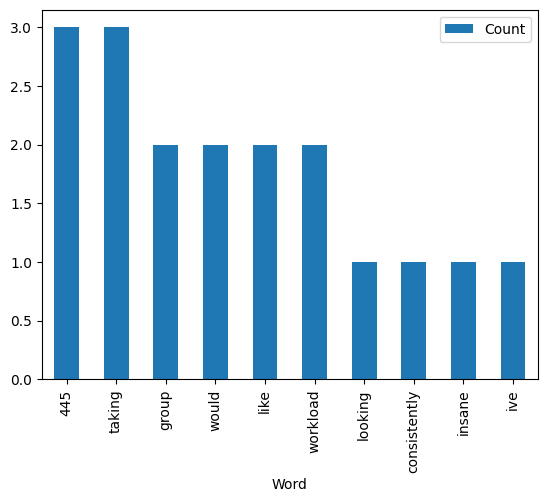

In [93]:
fdist = FreqDist(np.concatenate(tokens_negative))
fdist

pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')

<Axes: xlabel='Word'>

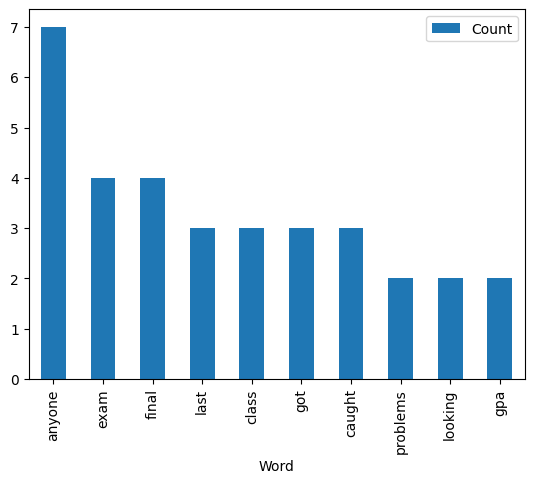

In [94]:
fdist = FreqDist(np.concatenate(tokens_neutral))
fdist
pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')

<Axes: xlabel='Word'>

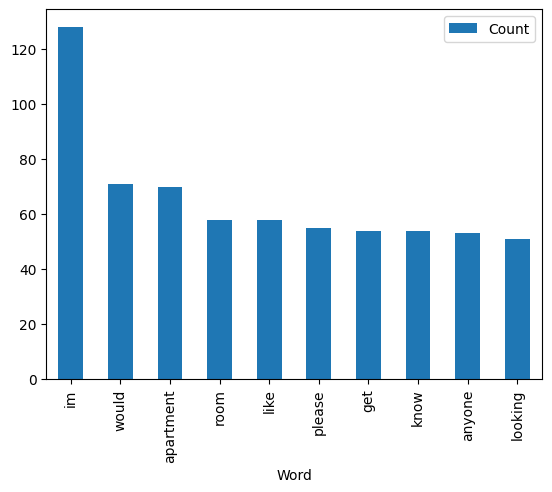

In [95]:
fdist = FreqDist(np.concatenate(tokens_positive))
fdist
pd.DataFrame(list(fdist.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).head(10).plot(kind='bar', x='Word', y='Count')